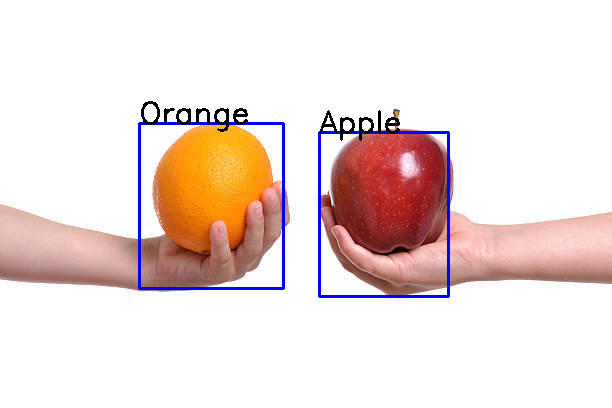

In [68]:
import cv2

def color_prediction(n):
    if n == 0:
        name = "Orange"
        lowerHSV = (0, 100, 100)
        upperHSV = (115, 255, 255)
        return name, lowerHSV, upperHSV

    if n == 1:
        name = "Apple"
        lowerHSV = (0, 100, 100)
        upperHSV = (10, 255, 255)
        return name, lowerHSV, upperHSV

image = cv2.imread('/content/object.jpeg')
HSVimage = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

rects = {}

for i in range(2):
    name, lowerHSV, upperHSV = color_prediction(i)

    mask = cv2.inRange(HSVimage, lowerHSV, upperHSV)

    contours, _ = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    if len(contours) > 0:
        biggest = sorted(contours, key=cv2.contourArea, reverse=True)[0]
        rect = cv2.boundingRect(biggest)
        x, y, w, h = rect
        cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)
        cv2.putText(image, name, (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2)

cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()